# Продажи видеоигр

Работу выполнили:

Ким Артём K3222

Андреев Николай K3221

##В этом датасете содержатся данные о видеоиграх, продажи которые превзошли 100 000 копий. Данные были сгенерированы при помощи vgchartz.com. Сам же датасет взят с сайта kaggle.com

*   Rank - Рейтинг суммарных продаж
*   Name - Название игры
*   Platform - Платформа выпуска игры (такие как PC, PS4, и т.д.)
*   Year - Год выпуска
*   Genre - Жанр игры
*   Publisher - Издательство
*   NA_Sales - Продажи в Северной Америке
*   EU_Sales - Продажи в Европе
*   JP_Sales - Продажи в Японии
*   Other_Sales - Продажи в остальных частях мира
*   Global_Sales - Суммарные продажи

Все данные по продажам представлены в миллионах

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [ ]:
vgsales = pd.DataFrame(pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1WFmK_FQchoXto0GcKz2lL6NNtOHEz3WZ'))

In [ ]:
vgsales.dropna(inplace = True)
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


##**Гипотеза:** Мировых продаж по годам больше всего в 2010

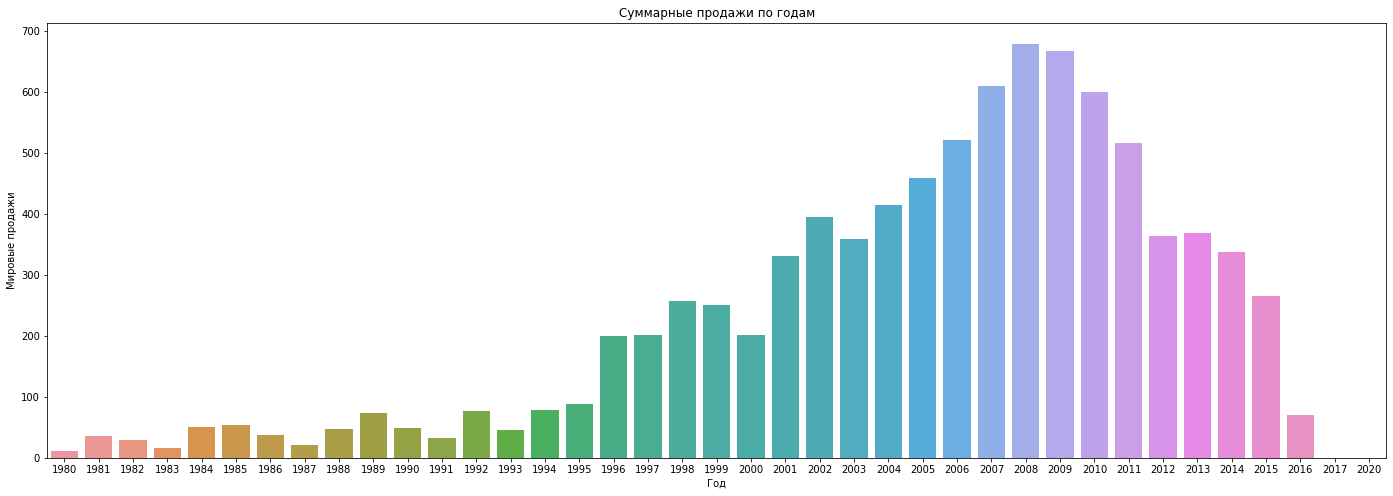

In [ ]:
vgsale_copy = vgsales.copy()

vgsale_copy = vgsale_copy.groupby('Year', as_index = False)['Global_Sales'].sum()
vgsale_copy['Year'] = vgsale_copy['Year'].astype(int)

fig, axis = plt.subplots(1, 1, figsize=(24, 8))

axis.set_title('Суммарные продажи по годам')
sns.barplot(ax = axis, y = vgsale_copy['Global_Sales'], x = vgsale_copy['Year'])
plt.ylabel('Мировые продажи')
plt.xlabel('Год')

pass

Проанализировав, можно сделать вывод о том, что в 2010 году, действительно, было немало продаж. Но наибольшее количество было продано в 2008 году

##**Гипотеза:** После 2005 года продаж во всём мире игр больше на консолях Sony чем на консолях Microsoft

Сравнивать будем по консолям в рамках одного поколения

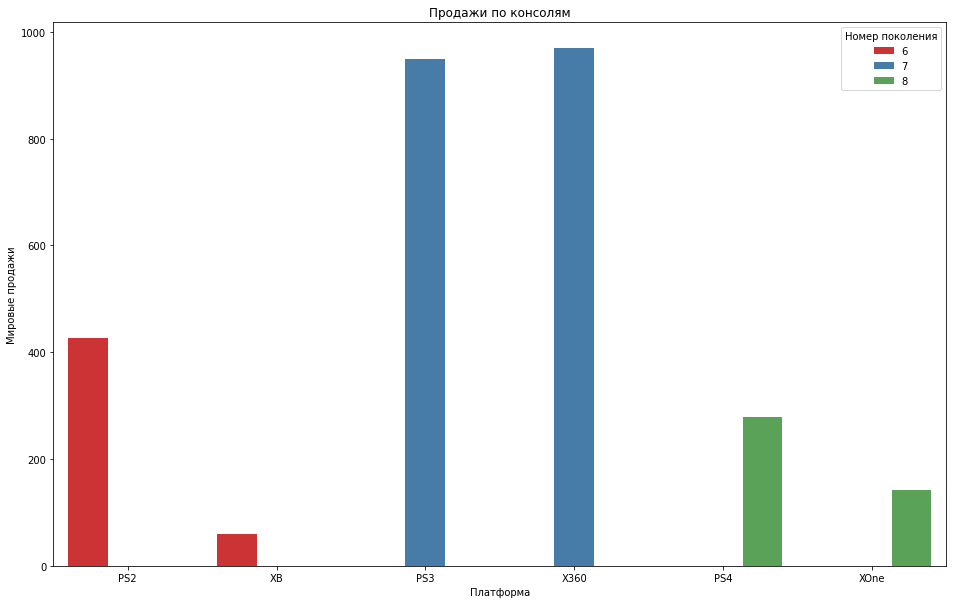

In [ ]:
vg_copy = vgsales.copy()

vg_copy = vg_copy[vg_copy.Year >= 2005]
vg_copy = vg_copy.groupby('Platform', as_index = False)['Global_Sales'].sum()
vg_copy = vg_copy[(vg_copy.Platform == 'PS2') | (vg_copy.Platform == 'PS3') | (vg_copy.Platform == 'PS4') | (vg_copy.Platform == 'XB') | (vg_copy.Platform == 'X360') | (vg_copy.Platform == 'XOne')]
vg_copy.insert(1, 'Generation', ['6', '7', '8', '7', '6', '8'])
vg_copy = vg_copy.sort_values(by = 'Generation', ascending = True)

fig, axis = plt.subplots(1, 1, figsize=(16, 10))

axis.set_title('Продажи по консолям')
plot = sns.barplot(ax = axis, y = vg_copy.Global_Sales, x = vg_copy.Platform, hue = vg_copy.Generation, palette="Set1")
plt.ylabel('Мировые продажи')
plt.xlabel('Платформа')
axis.legend(title = 'Номер поколения')

pass

По результатам видно, что суммарных продаж на консолях Sony было больше во время 6 и 8 поколения, в то время как, консоли Mircosoft, продали больше игр во время 7

##**Гипотеза:** соотношение проданных игр в Японии и в других частях света различаются

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


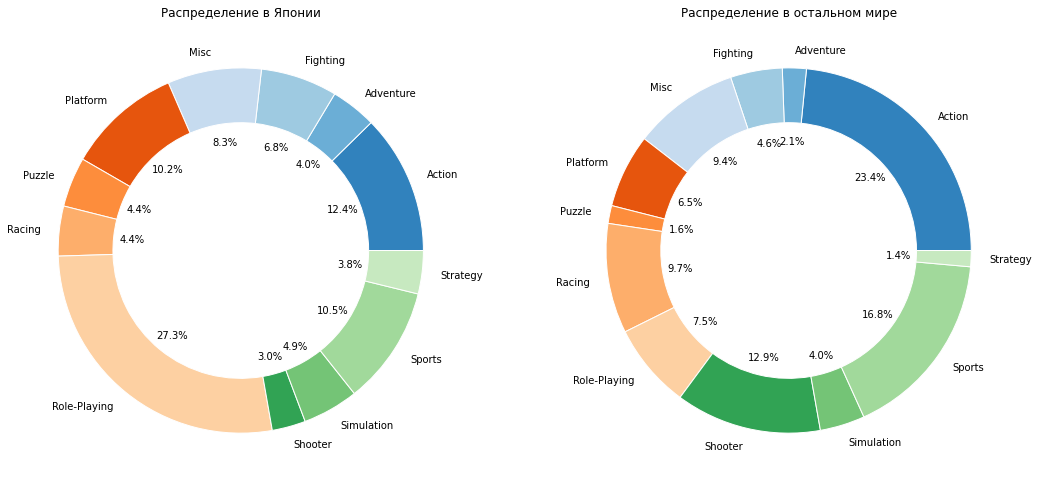

In [ ]:
vg_c = vgsales.copy()

vg_c = vg_c.groupby('Genre')['JP_Sales', 'Other_Sales'].sum()

fig, axis = plt.subplots(1, 2, figsize=(18, 24))

cmap = plt.get_cmap("tab20c")
colours = cmap(np.arange(12))

axis[0].pie(vg_c.JP_Sales, radius=1, labels = vg_c.index, colors = colours, wedgeprops = dict(width=0.3, edgecolor='w'), autopct = '%1.1f%%')
axis[0].set_title('Распределение в Японии')

axis[1].pie(vg_c.Other_Sales, radius=1, labels = vg_c.index, colors = colours, wedgeprops = dict(width=0.3, edgecolor='w'), autopct = '%1.1f%%')
axis[1].set_title('Распределение в остальном мире')

pass

Есть жанры в которых отличие достигает четырёх раз, но также есть и жанры схожие по объемам продаж, например, Simulation и Sports

##**Гипотеза:** Соотношение жанров проданных игр на всех консолях Sony одинаково

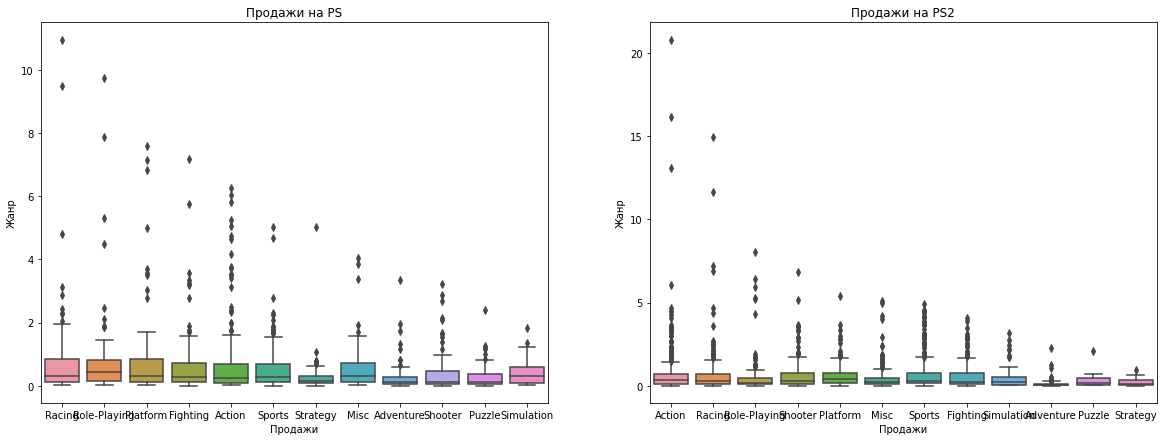

In [ ]:
vg = vgsales.copy()

PS = vg[vg.Platform == 'PS']
PS2 = vg[vg.Platform == 'PS2']
PS3 = vg[vg.Platform == 'PS3']
PS4 = vg[vg.Platform == 'PS4']
PSP = vg[vg.Platform == 'PSP']
PSV = vg[vg.Platform == 'PSV']

fig, axis = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(ax = axis[0], data = vgsales, x = PS['Genre'], y = PS['Global_Sales'])
axis[0].set_title('Продажи на PS')
axis[0].set_xlabel('Продажи')
axis[0].set_ylabel('Жанр')

sns.boxplot(ax = axis[1], data = vgsales, x = PS2['Genre'], y = PS2['Global_Sales'])
axis[1].set_title('Продажи на PS2')
axis[1].set_xlabel('Продажи')
axis[1].set_ylabel('Жанр')

pass

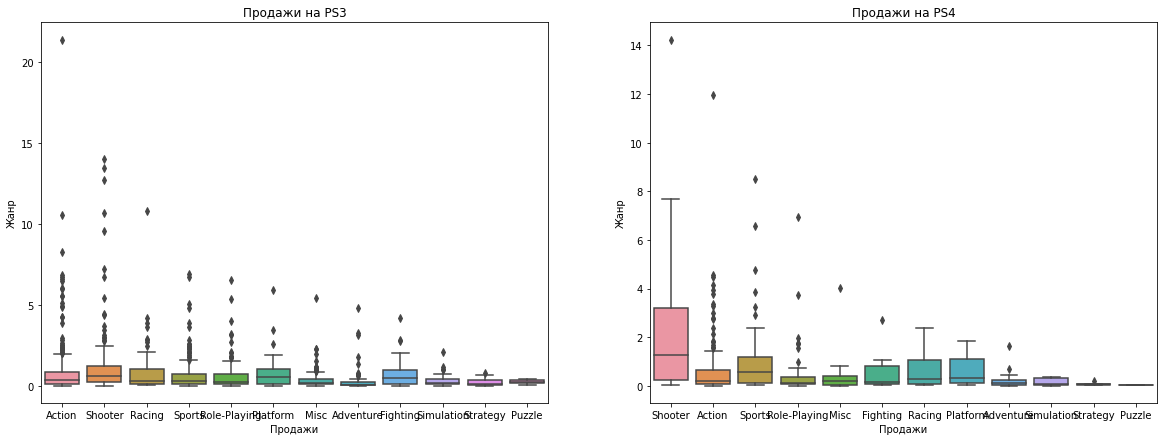

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(ax = axis[0], data = vgsales, x = PS3['Genre'], y = PS3['Global_Sales'])
axis[0].set_title('Продажи на PS3')
axis[0].set_xlabel('Продажи')
axis[0].set_ylabel('Жанр')

sns.boxplot(ax = axis[1], data = vgsales, x = PS4['Genre'], y = PS4['Global_Sales'])
axis[1].set_title('Продажи на PS4')
axis[1].set_xlabel('Продажи')
axis[1].set_ylabel('Жанр')

pass

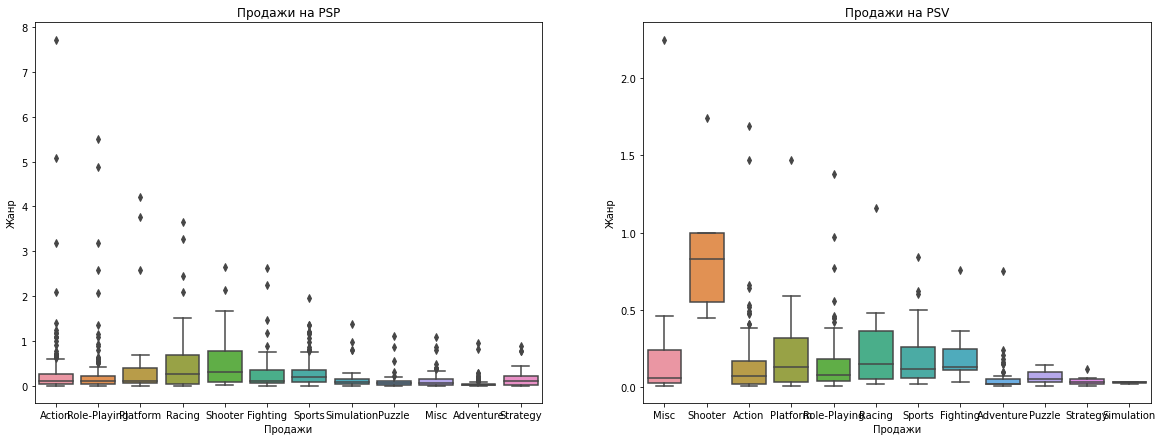

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(ax = axis[0], data = vgsales, x = PSP['Genre'], y = PSP['Global_Sales'])
axis[0].set_title('Продажи на PSP')
axis[0].set_xlabel('Продажи')
axis[0].set_ylabel('Жанр')

sns.boxplot(ax = axis[1], data = vgsales, x = PSV['Genre'], y = PSV['Global_Sales'])
axis[1].set_title('Продажи на PSV')
axis[1].set_xlabel('Продажи')
axis[1].set_ylabel('Жанр')

pass

Наблюдая графики, можно сделать выводы о неправдивости гипотезы. Продажи по жанрам достаточно отличаются от поколения консолей, но заметна некоторая приемственность поколений 

##**Гипотеза:** Топ-3 жанра отличаются в каждом регионе


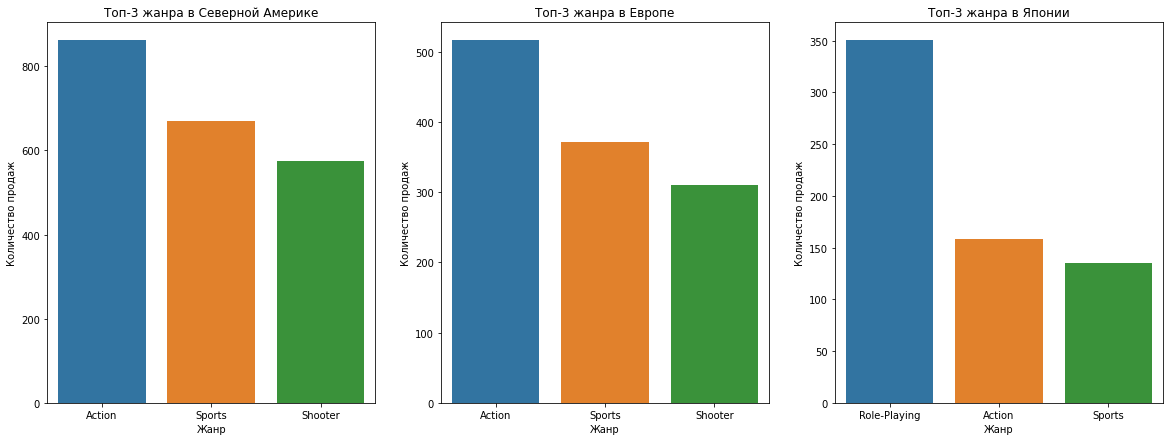

In [ ]:
vgsales_copy = vgsales.copy()
vgsales_copy = vgsales_copy.groupby('Genre', as_index=False).sum()

vgsales_copy = vgsales_copy.sort_values(by='NA_Sales', ascending=False)
TopNA = vgsales_copy.head(3)

vgsales_copy = vgsales_copy.sort_values(by='EU_Sales', ascending=False)
TopEU = vgsales_copy.head(3)

vgsales_copy = vgsales_copy.sort_values(by='JP_Sales', ascending=False)
TopJP = vgsales_copy.head(3)

fig, axis = plt.subplots(1, 3, figsize=(20, 7))

sns.barplot(ax = axis[0], x = TopNA.Genre, y = TopNA.NA_Sales)
axis[0].set_title("Топ-3 жанра в Северной Америке")
axis[0].set_ylabel("Количество продаж")
axis[0].set_xlabel("Жанр")

sns.barplot(ax = axis[1], x = TopEU.Genre, y = TopEU.EU_Sales)
axis[1].set_title("Топ-3 жанра в Европе")
axis[1].set_ylabel("Количество продаж")
axis[1].set_xlabel("Жанр")

sns.barplot(ax = axis[2], x = TopJP.Genre, y = TopJP.JP_Sales)
axis[2].set_title("Топ-3 жанра в Японии")
axis[2].set_ylabel("Количество продаж")
axis[2].set_xlabel("Жанр")

pass

Как видно: топ жанров в Северной Америке и Европе разиличаются только по количеству продаж, а Япония имеет свой уникальный топ

##**Гипотеза:** Болишинство игр было выпущено в 2000-х

In [ ]:
vgsales_copy = vgsales[['Name']].copy()
vgsales_years = vgsales[['Name', 'Year']].copy()
vgsales_copy = vgsales_copy.groupby('Name', as_index=False).sum()

vgsales_copy = vgsales_copy.merge(vgsales_years)
vgsales_copy.drop_duplicates(subset=['Name'], inplace=True)
vgsales_1900 = vgsales_copy.loc[(vgsales_copy.Year < 2000)]
vgsales_1900 = vgsales_1900.Name.count()

vgsales_2000 = vgsales_copy.loc[(vgsales_copy.Year >= 2000)]
vgsales_2000 = vgsales_2000.Name.count()

vgsales_byYear = {'Count': [vgsales_1900, vgsales_2000], 'Year': ['До 2000-х', 'В 2000-х']}
df = pd.DataFrame(data=vgsales_byYear)

fig = px.pie(df, names=df['Year'], values=df['Count'], labels=df.index, hole=.5)
fig.show()

На графике явно показано преобладание изданных игр после 2000 года

##**Гипотеза:** 3 самых популярных жанра: Action, Shooter, Role-Playing

In [ ]:
vgsales_copy = vgsales[['Name', 'Global_Sales']].copy()

vgsales_genres = vgsales[['Name', 'Genre']].copy()
vgsales_copy = vgsales_copy.groupby('Name', as_index=False)['Global_Sales'].sum()
vgsales_copy = vgsales_copy.merge(vgsales_genres)
vgsales_copy.drop_duplicates(subset=['Name'], inplace=True)
vgsales_copy['count'] = 1


top3_genre = vgsales_copy.groupby('Genre', as_index=False)['count'].sum()
top3_genre = top3_genre.sort_values(by='count', ascending=False).head(3)['Genre'].copy()
top3_genre = list(top3_genre)

vgsales_copy = vgsales_copy[vgsales_copy['Genre'].isin(top3_genre)]
vgsales_copy = vgsales_copy.groupby(by=['Genre', 'Name', 'Global_Sales'], as_index = False).count().sort_values(by='Global_Sales', ascending=False)

top = pd.DataFrame(columns=['Genre', 'Name', 'Global_Sales'])

for i in top3_genre:
  top = top.append(vgsales_copy[(vgsales_copy['Genre'] == i) & (vgsales_copy['Name'] != 'empty_field')].head(3))

  fig = px.sunburst(top, path=['Genre', 'Name'], values='Global_Sales')
fig.show()

На круговой диаграмме изображены топ-3 жанра по количеству проданных игр. В добавок  представленны топ-3 игр

##**Гипотеза:** Количество изданных игр равно в каждом жанре

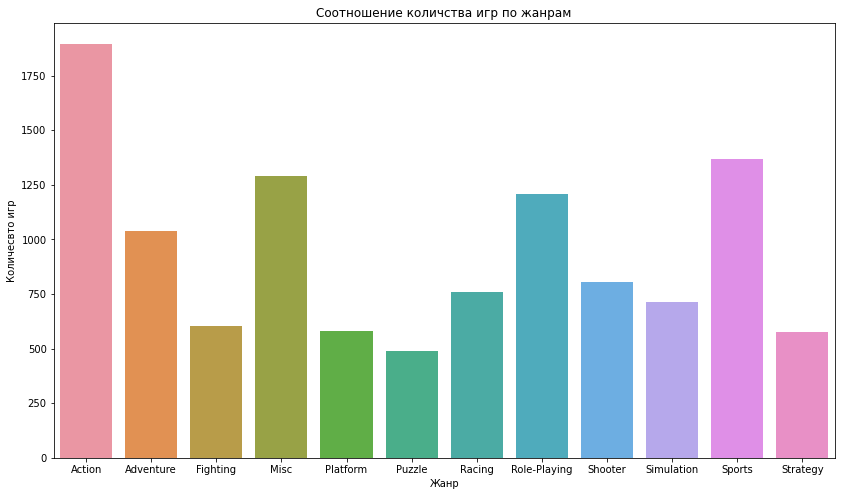

In [ ]:
vgsales_copy = vgsales[['Name', 'Global_Sales']].copy()

vgsales_genres = vgsales[['Name', 'Genre']].copy()
vgsales_copy = vgsales_copy.groupby('Name', as_index=False)['Global_Sales'].sum()
vgsales_copy = vgsales_copy.merge(vgsales_genres)

vgsales_copy.drop_duplicates(subset=['Name'], inplace=True)
vgsales_copy = vgsales_copy.groupby('Genre', as_index=False).count()


fig, axis = plt.subplots(1, 1, figsize=(14, 8))

axis.set_title('Соотношение количства игр по жанрам')
sns.barplot(ax = axis, y = vgsales_copy['Name'], x = vgsales_copy['Genre'])
plt.ylabel('Количесвто игр')
plt.xlabel('Жанр')

pass

Как видно по графику, количество игр в жаре экшн сильно превосходит другие